In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('overall_log.csv', index_col=False) 

def get_df(df, model_name, bit):
    return df[(df['Model Name'] == model_name) & (df['Bits']==bit)]

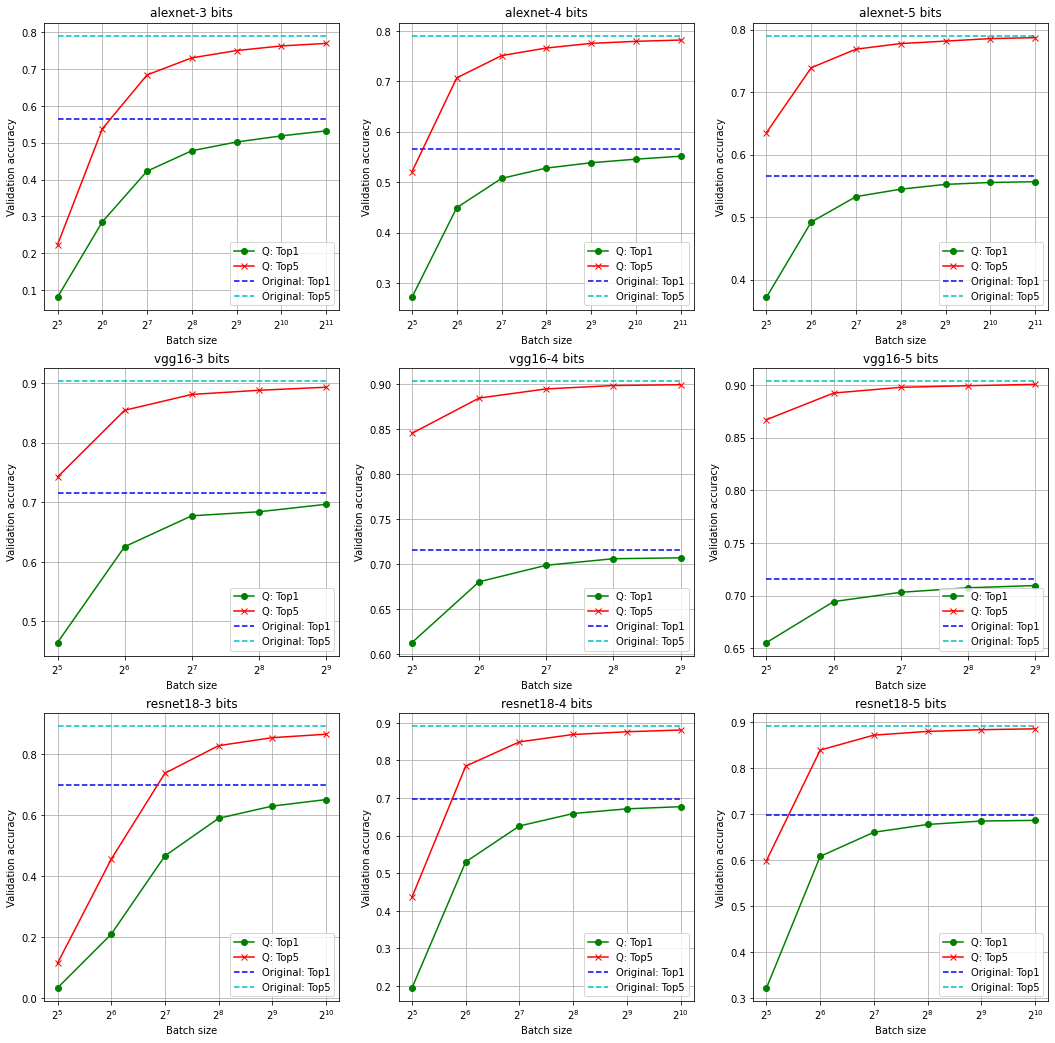

In [17]:
fig = plt.figure(figsize=(18, 18))  
model_names = ['alexnet', 'vgg16', 'resnet18']
bit_list = [3, 4, 5]

for i, model in enumerate(model_names):
    for j, bit in enumerate(bit_list):
        ax = fig.add_subplot(len(model_names), len(bit_list), i*len(bit_list)+j+1) 
        temp_df = get_df(df, model, bit).sort_values(by=['Quantization Batch Size'])
        batch_sizes = list(temp_df.iloc[:, 2])
        ax.plot(batch_sizes, temp_df.iloc[:,4], '-o', color='g', label='Q: Top1')
        ax.plot(batch_sizes, temp_df.iloc[:,6], '-x', color='r', label='Q: Top5')
        ax.hlines(y=temp_df.iloc[0, 3], xmin=batch_sizes[0], xmax=batch_sizes[-1], 
                label='Original: Top1', linestyles='--', color='b')
        ax.hlines(y=temp_df.iloc[0, 5], xmin=batch_sizes[0], xmax=batch_sizes[-1], 
                label='Original: Top5', linestyles='--', color='c')
        ax.set_xscale('log', base=2)
        ax.legend(loc='lower right')
        ax.grid()
        ax.set_xlabel('Batch size')
        ax.set_ylabel('Validation accuracy')
        ax.set_title(f'{model}-{bit} bits')